Install and Load Libraries

In [3]:
!pip install pandas numpy matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the Data

In [7]:
import os
os.getcwd()

'c:\\Users\\admin\\Downloads'

In [8]:
df = pd.read_csv("diabetes.csv")

Describe the data


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Cleaning the data

In [ ]:
df.drop(['Insulin','SkinThickness'], axis=1, inplace=True)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1


In [ ]:
col_with_zeros = ['Glucose', 'BloodPressure','BloodPressure', 'BMI']
for col in col_with_zeros:
    df[col] = df[col].replace(0,df[col].median())

In [ ]:
df[col_with_zeros].eq(0).sum()

Glucose          0
BloodPressure    0
BloodPressure    0
BMI              0
dtype: int64

In [ ]:
def age_to_group(age):
    if age < 30:
        return '18-29'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    elif age < 60:
        return '50-59'
    else:
        return '60+' 
df['AgeGroup'] = df['Age'].apply(age_to_group)

NameError: name 'df' is not defined

Visualizations

Text(0.5, 1.0, 'Diabetes and Non-Diabetes Distribution')

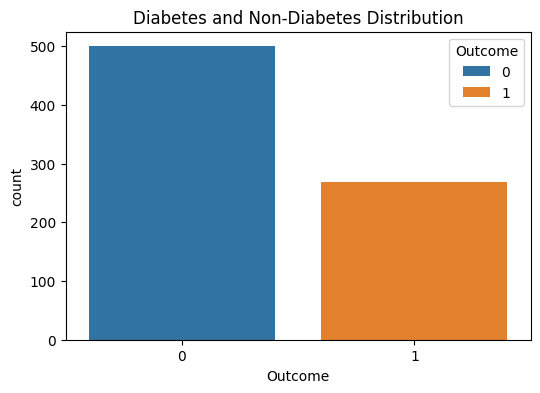

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome',data=df,hue='Outcome')
plt.title("Diabetes and Non-Diabetes Distribution")

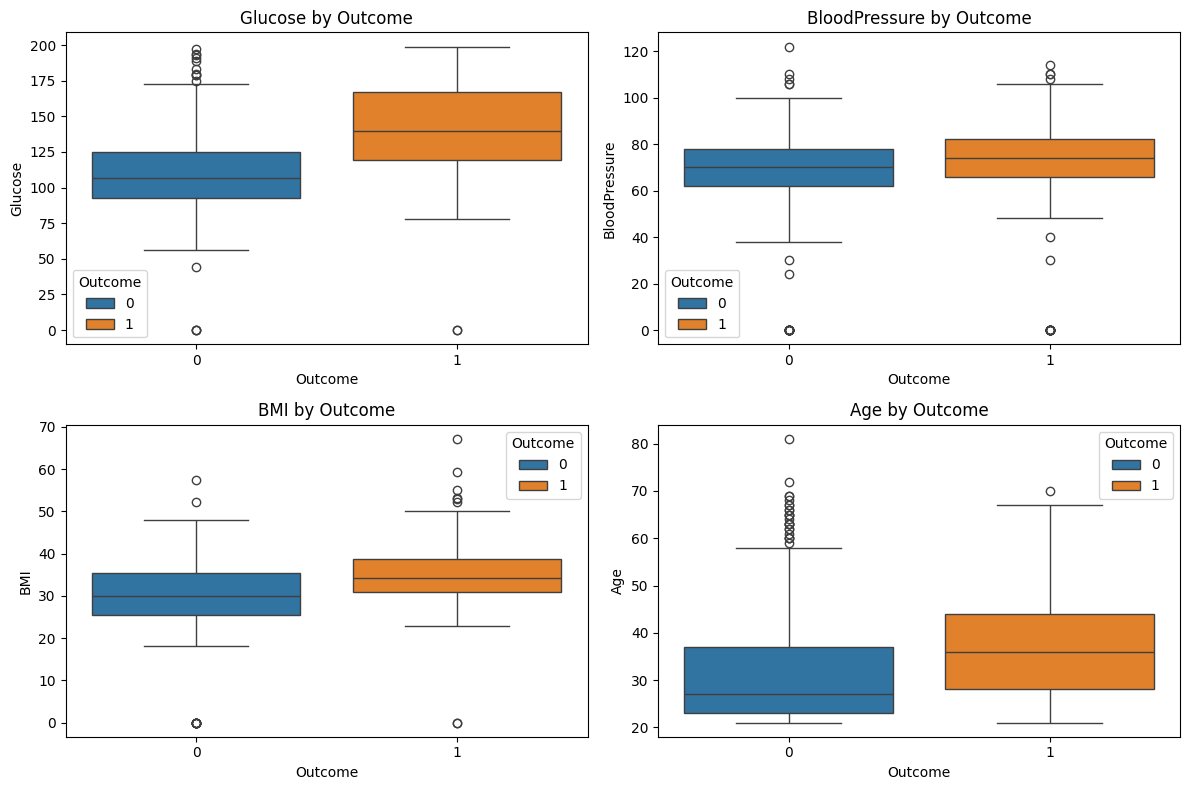

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns

for i, col in enumerate(['Glucose', 'BloodPressure', 'BMI', 'Age']):
    sns.boxplot(x='Outcome', y=col, data=df, hue='Outcome', ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(f'{col} by Outcome')

plt.tight_layout()
plt.show()


<Axes: xlabel='Pregnancies', ylabel='Glucose'>

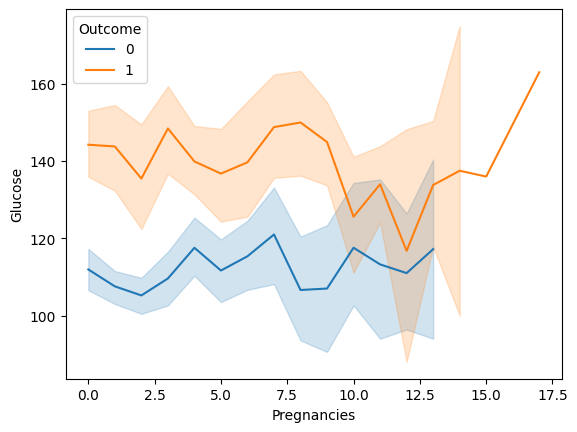

In [ ]:
sns.lineplot(data=df, x='Pregnancies', y='Glucose', hue='Outcome')

<Axes: >

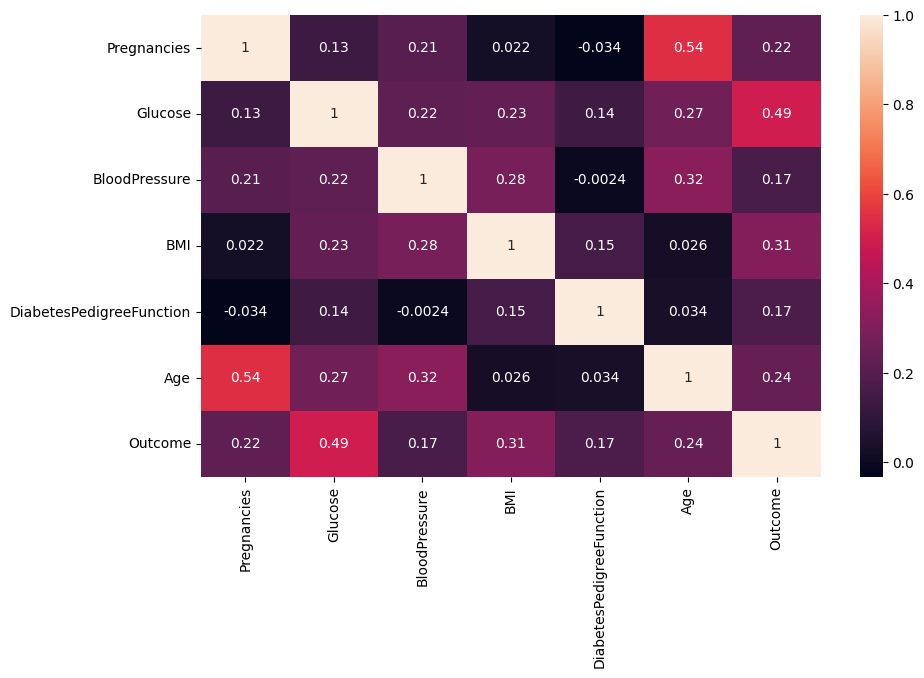

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)